In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import missingno


In [154]:
df = pd.read_csv("hourlywagedata.csv")
df

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338
...,...,...,...,...
2995,0,3,4,20.4198852740072
2996,0,3,4,20.4414824085212
2997,1,3,4,18.4502340056492
2998,0,3,4,19.1444598024073


In [155]:
df = df.replace(' ', np.NaN)
df = df.dropna()

df

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338
...,...,...,...,...
2995,0,3,4,20.4198852740072
2996,0,3,4,20.4414824085212
2997,1,3,4,18.4502340056492
2998,0,3,4,19.1444598024073


Rows containing no data are dropped from df

In [156]:
df.dtypes


position     int64
agerange     int64
yrsscale     int64
hourwage    object
dtype: object

In [157]:
df['hourwage'] = df['hourwage'].astype(np.float64)
df.dtypes



position      int64
agerange      int64
yrsscale      int64
hourwage    float64
dtype: object

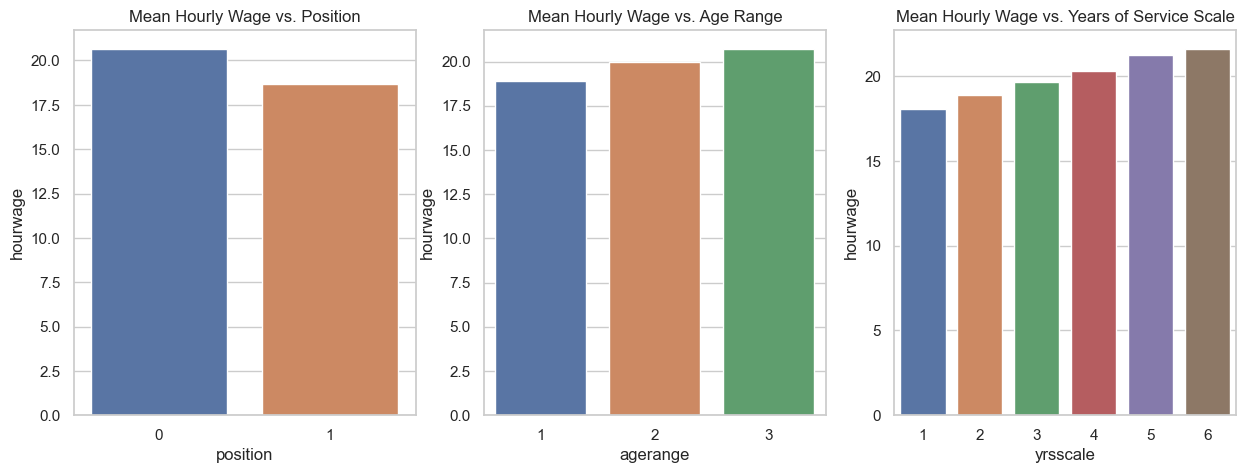

In [170]:
grouped_by_position = df.groupby("position")["hourwage"].mean().reset_index()
grouped_by_agerange = df.groupby("agerange")["hourwage"].mean().reset_index()
grouped_by_yrsscale = df.groupby("yrsscale")["hourwage"].mean().reset_index()


x_data=['position','agerange','yrsscale']
data_sets=[grouped_by_position,grouped_by_agerange,grouped_by_yrsscale]
plot_titles=['Mean Hourly Wage vs. Position','Mean Hourly Wage vs. Age Range','Mean Hourly Wage vs. Years of Service Scale']

fig, ax=plt.subplots(1,3,figsize=(15,5))

for i in range(len(x_data)):
    sns.barplot(x=x_data[i], y="hourwage", data=data_sets[i],ax=ax[i])
    ax[i].set_title(plot_titles[i])
plt.show()




In [159]:
X = df.drop("hourwage", axis=1).values
y = df["hourwage"].values


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2328, 3) (2328,)
Test data: (583, 3) (583,)


In [161]:
print('Mean hourly wage of training set:',y_train.mean())
print('Mean hourly wage of testing set:',y_test.mean())

Mean hourly wage of training set: 19.97091506091839
Mean hourly wage of testing set: 20.195331567480192


The mean hourly wages of the training and testing set are both approximately 20 so both sets are similar in proportion to each other.

In [162]:
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
predictions[:10]

array([21.70017348, 19.50284073, 21.81426952, 17.44806301, 18.21853927,
       17.56215905, 18.84646051, 21.04379326, 21.70017348, 19.64539576])

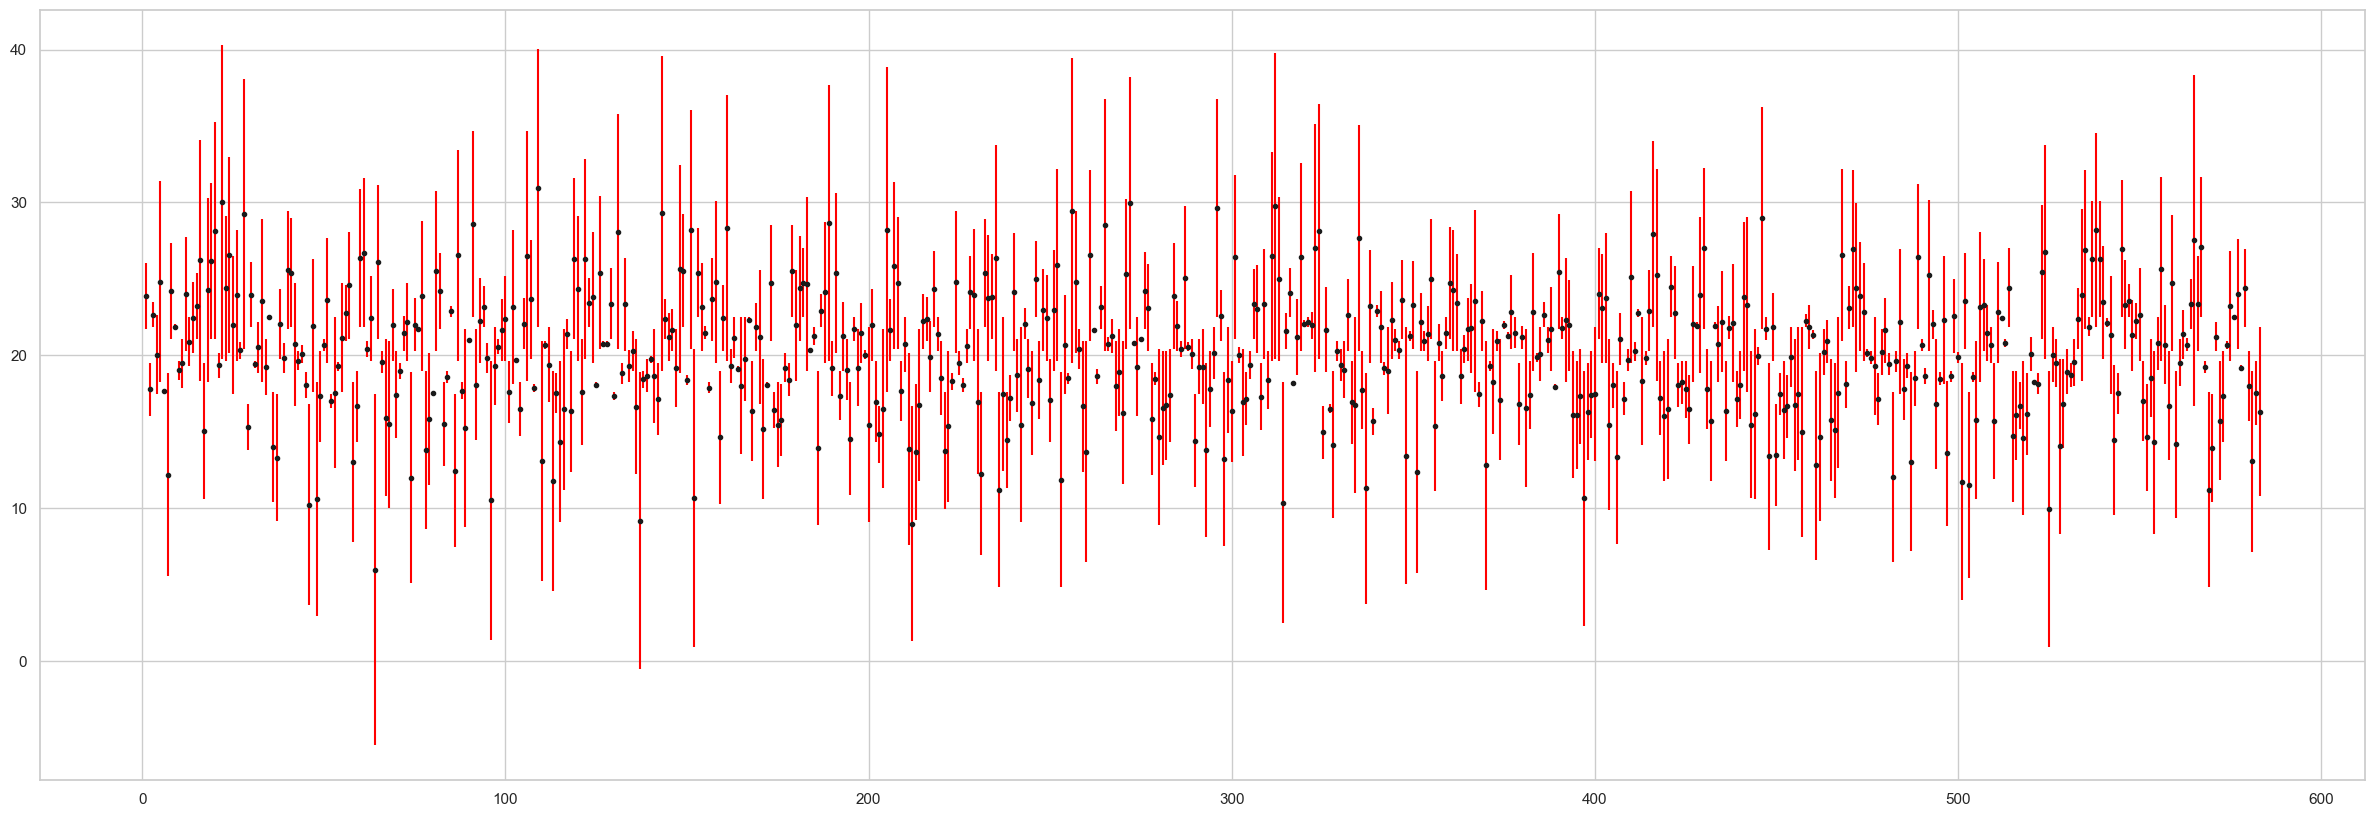

In [163]:
fig = plt.figure(figsize=(30,10))
plt.errorbar(range(1,len(y_test)+1), y_test, yerr=(abs(y_test-predictions)), fmt='.k', ecolor="red")
plt.show()

In [164]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.900031607017037


In [168]:
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)
print("hourwage=-2.05(position)-0.11(agerange)+0.77(yrsscale)")

Intercept: 18.190080281103544
Coefficients: [-2.05477772 -0.11409604  0.77047626]
hourwage=-2.05(position)-0.11(agerange)+0.77(yrsscale)


Position and age range have a negative impact on hourly wage and yearly service has a positive impact. Position has the highest magnitude of impact of hourly wage and age has the least